# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading Datasets

In [2]:
 # Paths to your datasets
train_path = 'train.csv'
test_path = 'test.csv'

# Data Preprocessing

In [3]:
def comprehensive_data_preprocessing(train_path, test_path):
    """
    Comprehensive data preprocessing with detailed handling of NaN values

    Parameters:
    train_path (str): Path to training dataset
    test_path (str): Path to test dataset

    Returns:
    tuple: Preprocessed train and test dataframes
    """
    # Load data
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Print initial NaN information
    print("Initial NaN values in training data:")
    print(train_df.isnull().sum())
    print("\nInitial NaN values in test data:")
    print(test_df.isnull().sum())

    # Convert date column to datetime
    train_df['dteday'] = pd.to_datetime(train_df['dteday'])
    test_df['dteday'] = pd.to_datetime(test_df['dteday'])

    # Identify column types
    numeric_cols = ['temp', 'atemp', 'hum', 'windspeed']
    categorical_cols = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

    # Comprehensive NaN handling
    # For numeric columns
    for col in numeric_cols:
        # Replace NaN with median from training data
        median_val = train_df[col].median()
        train_df[col].fillna(median_val, inplace=True)
        test_df[col].fillna(median_val, inplace=True)

    # For categorical columns
    for col in categorical_cols:
        # Replace NaN with mode from training data
        mode_val = train_df[col].mode()[0]
        train_df[col].fillna(mode_val, inplace=True)
        test_df[col].fillna(mode_val, inplace=True)

    # Verify NaN elimination
    print("\nNaN values after initial preprocessing:")
    print("Training data:")
    print(train_df.isnull().sum())
    print("\nTest data:")
    print(test_df.isnull().sum())

    return train_df, test_df
# Comprehensive Preprocessing
train_df, test_df = comprehensive_data_preprocessing(train_path, test_path)

Initial NaN values in training data:
Id              0
dteday         31
season         45
yr             37
mnth           36
hr             26
holiday        32
weekday        40
workingday     30
weathersit     31
temp          184
atemp         181
hum           157
windspeed     164
cnt             0
dtype: int64

Initial NaN values in test data:
Id            0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

NaN values after initial preprocessing:
Training data:
Id             0
dteday        31
season         0
yr            37
mnth           0
hr            26
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
cnt            0
dtype: int64

Test data:
Id            0
dteday        0
season        0
yr            0
mnth     

<ipython-input-3-961747e56a88>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(median_val, inplace=True)
<ipython-input-3-961747e56a88>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

# Feature Engenering

In [4]:
def advanced_feature_engineering(train_df, test_df):
    """
    Advanced feature engineering with additional transformations

    Parameters:
    train_df (pd.DataFrame): Training dataset
    test_df (pd.DataFrame): Test dataset

    Returns:
    tuple: Dataframes with new features
    """
    for df in [train_df, test_df]:
        # Extract time-based features
        df['day_of_week'] = df['dteday'].dt.dayofweek
        df['day_of_year'] = df['dteday'].dt.dayofyear
        df['month'] = df['dteday'].dt.month
        df['year'] = df['dteday'].dt.year

        # Advanced interaction features
        df['temp_hum_interaction'] = df['temp'] * df['hum']
        df['temp_wind_interaction'] = df['temp'] * df['windspeed']

        # Non-linear transformations
        df['temp_squared'] = df['temp'] ** 2
        df['hum_squared'] = df['hum'] ** 2

        # Trigonometric features for cyclical encoding
        df['sin_hour'] = np.sin(df['hr'] * (2 * np.pi / 24))
        df['cos_hour'] = np.cos(df['hr'] * (2 * np.pi / 24))

    return train_df, test_df
# Advanced Feature Engineering
train_df, test_df = advanced_feature_engineering(train_df, test_df)


# Exploratory Data Analysis

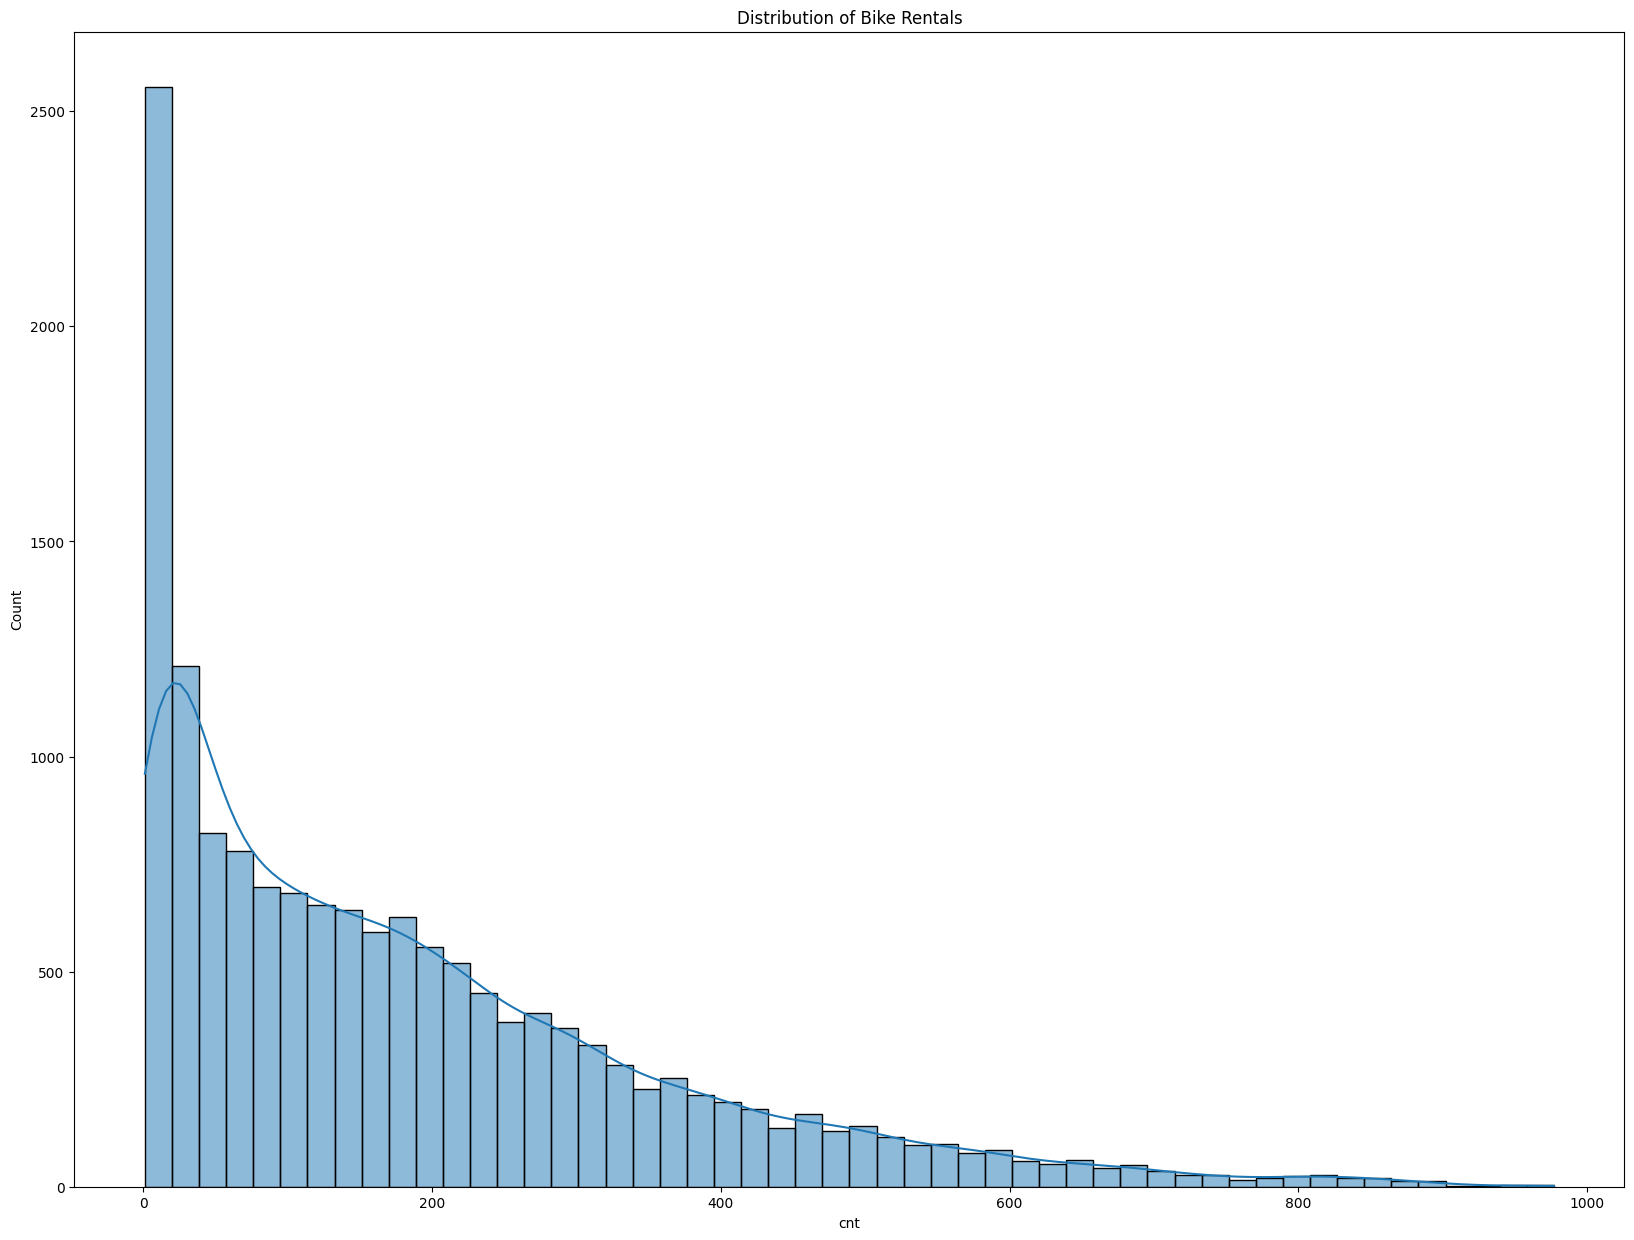

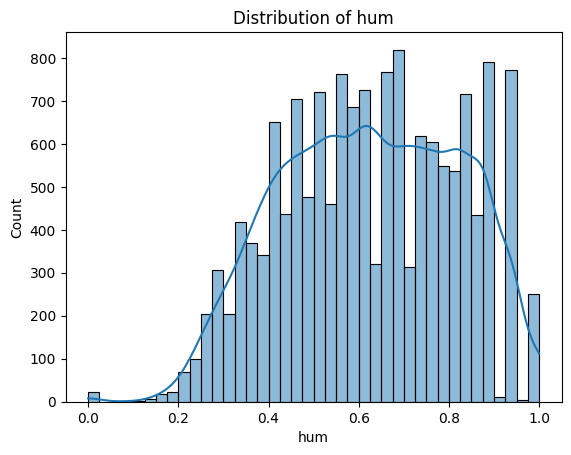

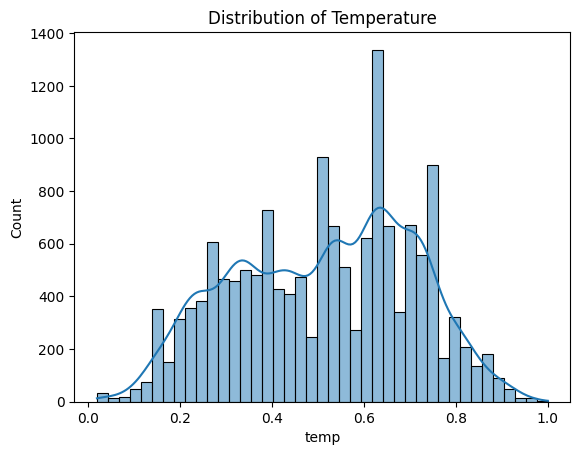

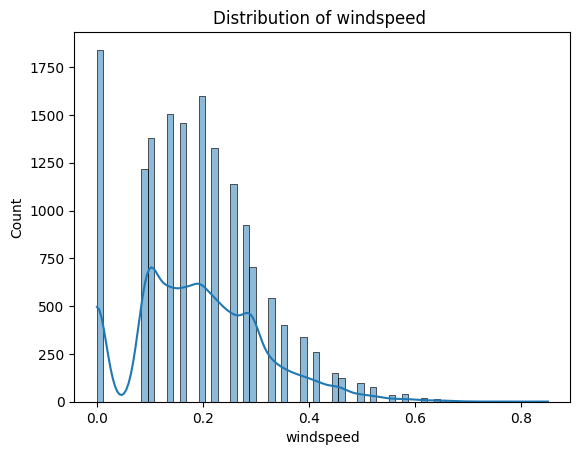

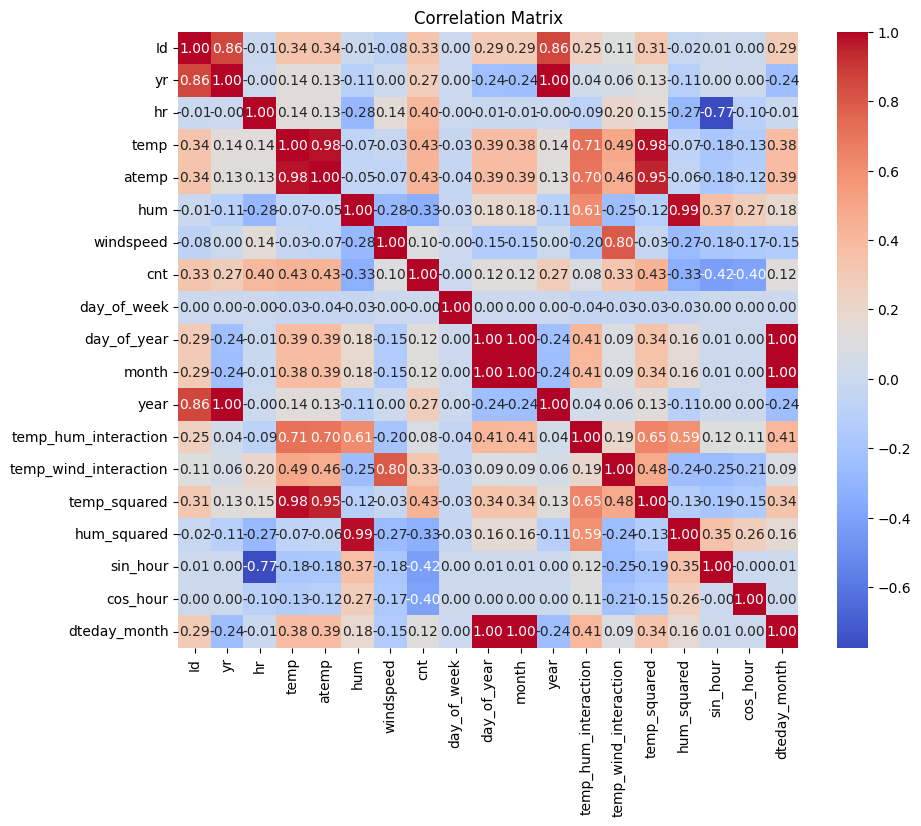

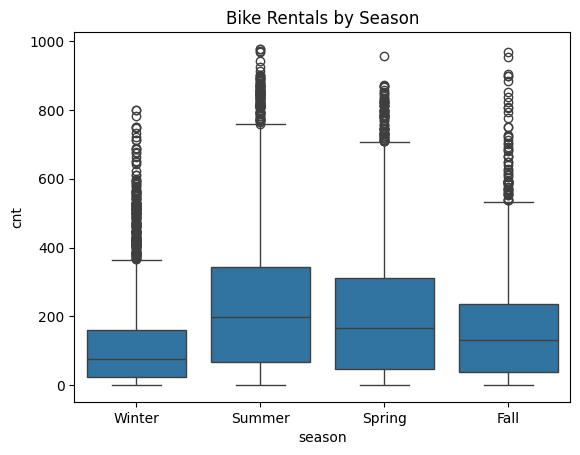

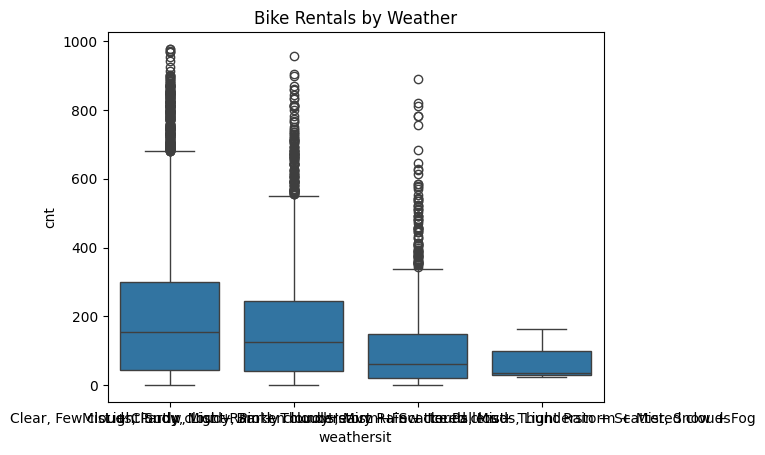

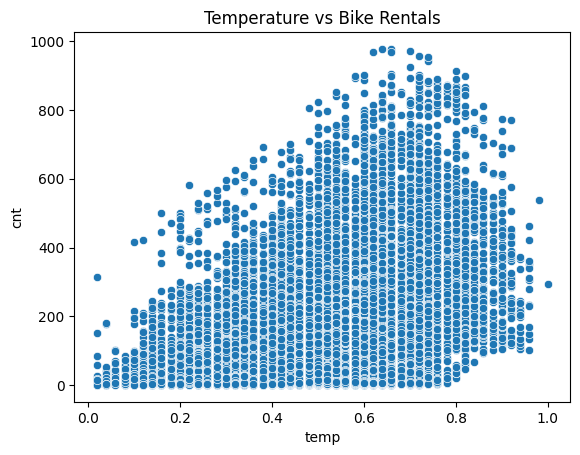

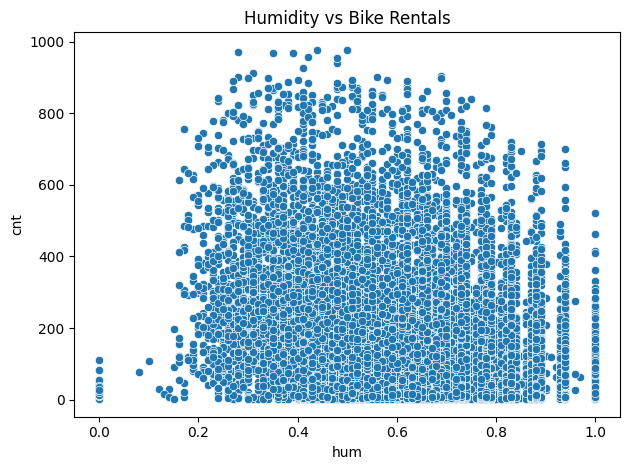

In [16]:
# Exploratory Data Analysis
def perform_eda(train_df):
    """
    Perform Exploratory Data Analysis

    Parameters:
    train_df (pd.DataFrame): Training dataset
    """
    plt.figure(figsize=(20,15))

    # 1. Distribution of bike rentals
    # plt.subplot(2,3,1)
    sns.histplot(train_df['cnt'], kde=True)
    plt.title('Distribution of Bike Rentals')
    plt.show()
    # Distribution of hum
    # plt.subplot(2,3,1)
    sns.histplot(train_df['hum'], kde=True)
    plt.title('Distribution of hum')
    plt.show()
    #Distribution of Temperature
    # plt.subplot(2,3,1)
    sns.histplot(train_df['temp'], kde=True)
    plt.title('Distribution of Temperature')
    plt.show()
    #Distribution of windspeed
    # plt.subplot(2,3,1)
    sns.histplot(train_df['windspeed'], kde=True)
    plt.title('Distribution of windspeed ')
    plt.show()
     #Create a correlation heatmap for numerical features in the dataframe.

    # Parameters:
    # - df: Input pandas DataFrame
    # - figsize: Figure size for the plot (default: 12x10)
    # #
    # Select only numerical columns (int and float)
    numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

    # Create correlation matrix
    correlation_matrix = train_df[numerical_cols].corr()

    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

    # 3. Bike Rentals by Season
    # plt.subplot(2,3,3)
    sns.boxplot(x='season', y='cnt', data=train_df)
    plt.title('Bike Rentals by Season')
    plt.show()
    # 4. Bike Rentals by Weather Situation
    # plt.subplot(2,3,4)
    sns.boxplot(x='weathersit', y='cnt', data=train_df)
    plt.title('Bike Rentals by Weather')
    plt.show()
    # 5. Temperature vs Bike Rentals
    # plt.subplot(2,3,5)
    sns.scatterplot(x='temp', y='cnt', data=train_df)
    plt.title('Temperature vs Bike Rentals')
    plt.show()
    # 6. Humidity vs Bike Rentals
    # plt.subplot(2,3,6)
    sns.scatterplot(x='hum', y='cnt', data=train_df)
    plt.title('Humidity vs Bike Rentals')

    plt.tight_layout()
    plt.show()

perform_eda(train_df)


# Time Series Analysis

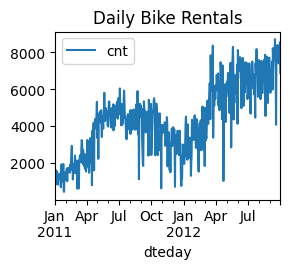

<ipython-input-17-fb46115162cc>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals = daily_rentals.resample('M').sum()


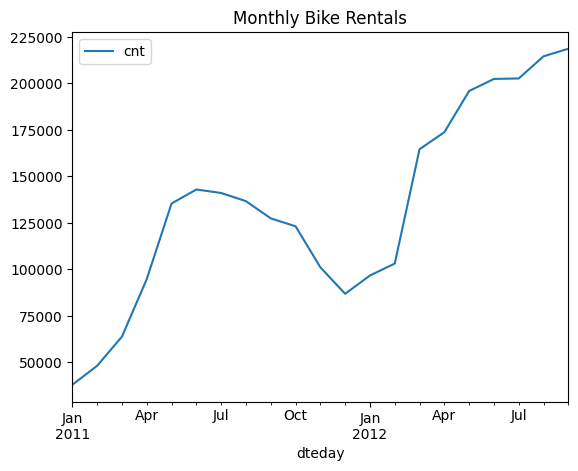

<ipython-input-17-fb46115162cc>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_rentals = daily_rentals.resample('Y').sum()


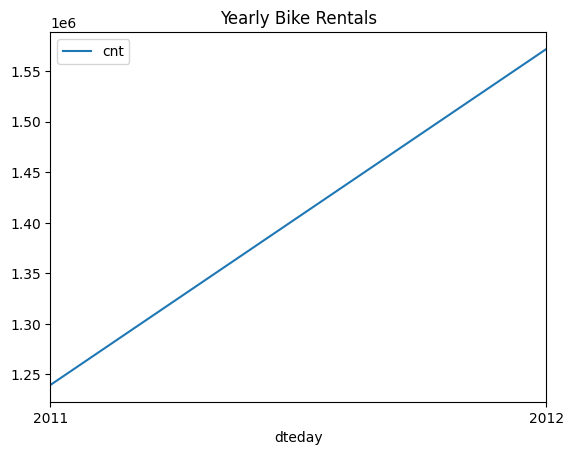

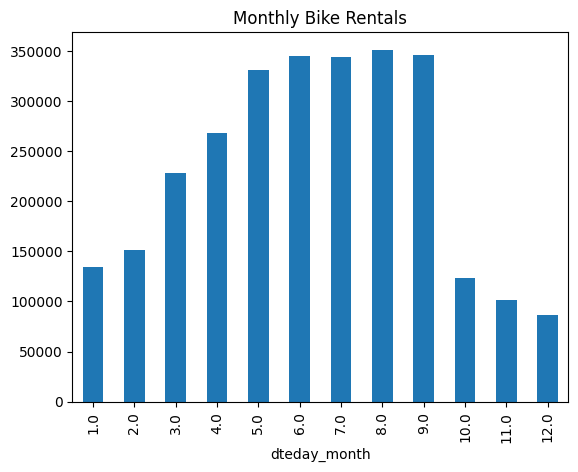

<Figure size 640x480 with 0 Axes>

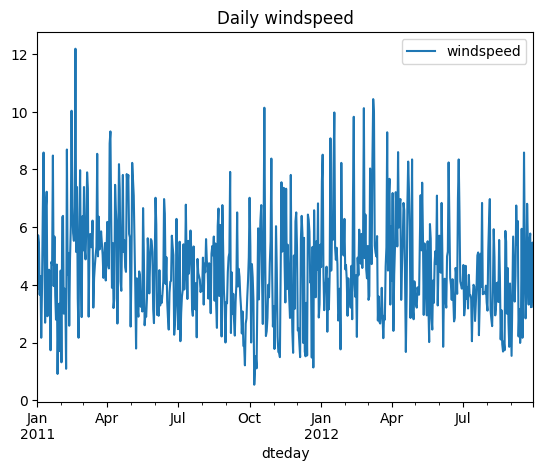

<ipython-input-17-fb46115162cc>:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals = daily_rentals.resample('M').sum()


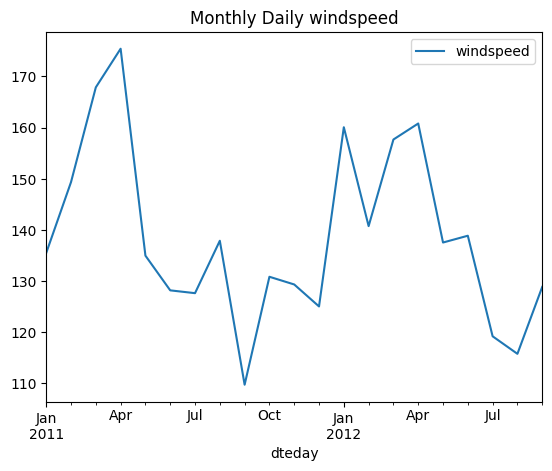

<ipython-input-17-fb46115162cc>:53: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_rentals = daily_rentals.resample('Y').sum()


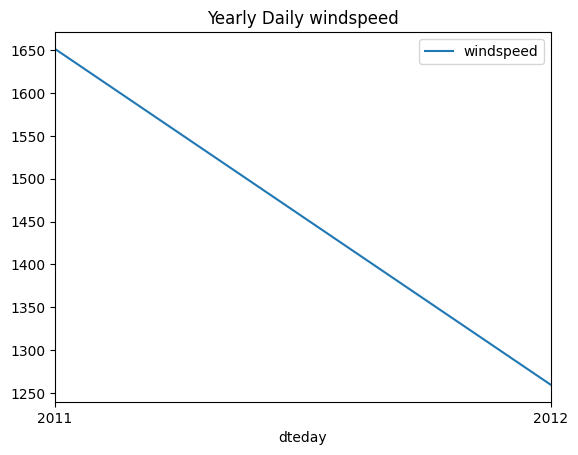

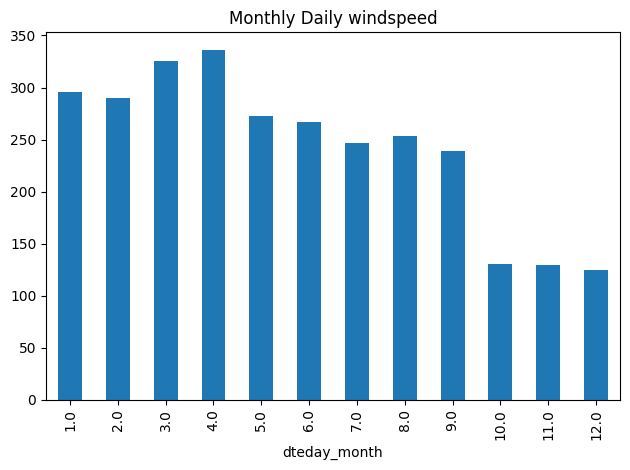

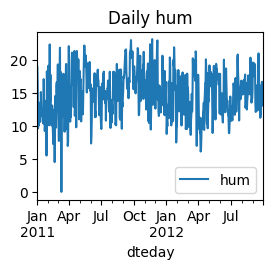

<ipython-input-17-fb46115162cc>:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals = daily_rentals.resample('M').sum()


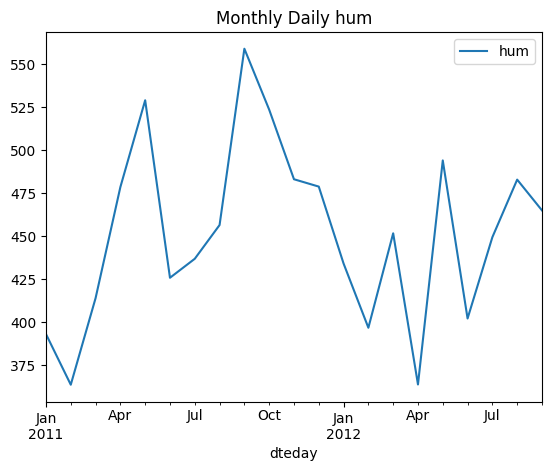

<ipython-input-17-fb46115162cc>:82: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_rentals = daily_rentals.resample('Y').sum()


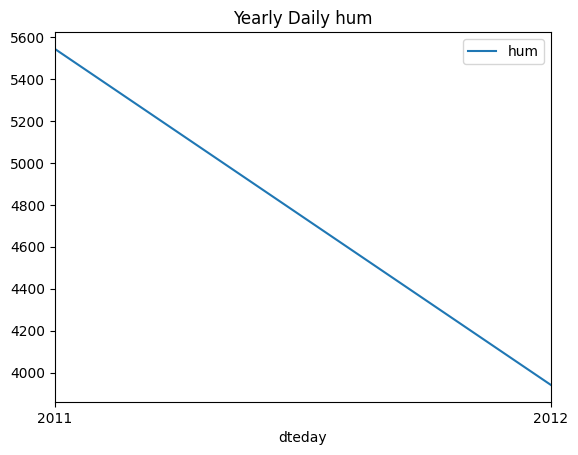

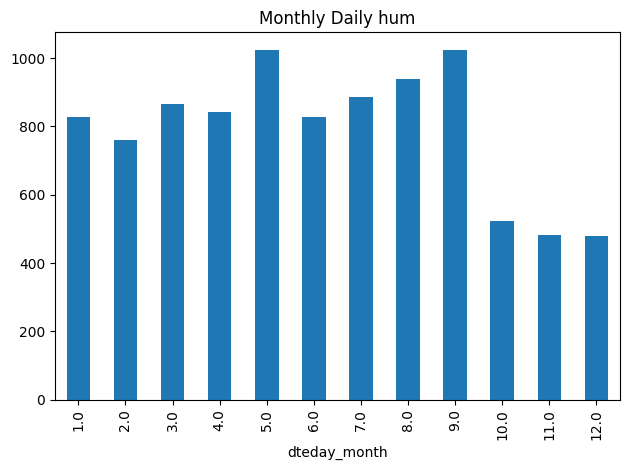

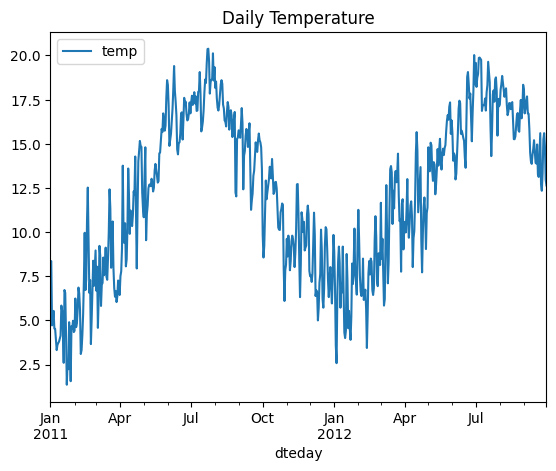

<ipython-input-17-fb46115162cc>:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals = daily_rentals.resample('M').sum()


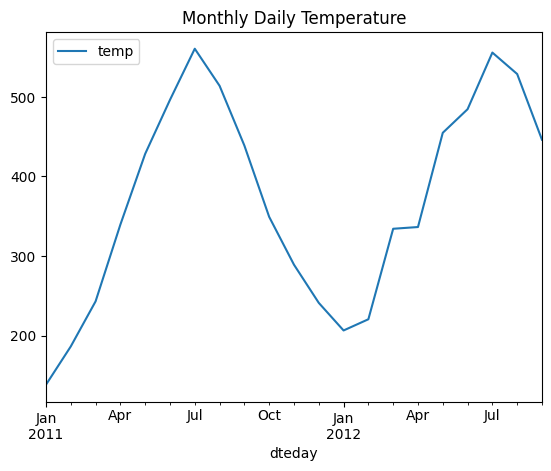

<ipython-input-17-fb46115162cc>:109: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_rentals = daily_rentals.resample('Y').sum()


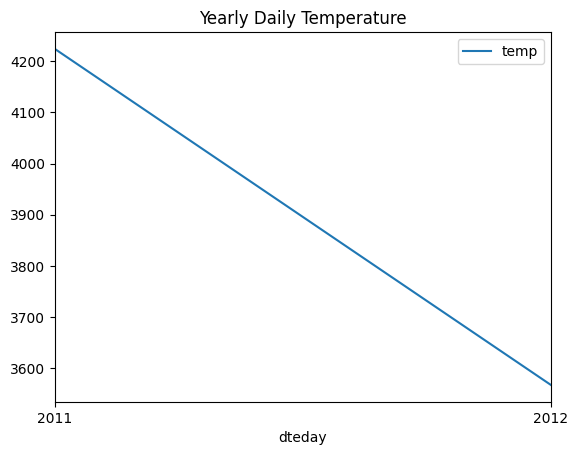

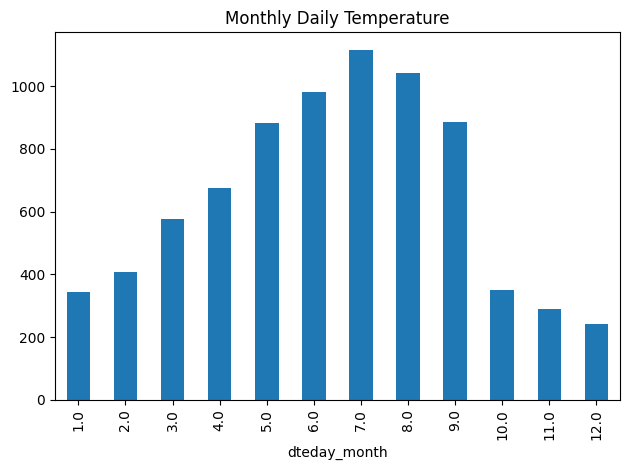

In [17]:
# Time Series Analysis
def time_series_analysis(train_df):
    """
    Perform Time Series Analysis

    Parameters:
    train_df (pd.DataFrame): Training dataset
    """
    # Aggregate data by day
    daily_rentals = train_df.groupby('dteday')['cnt'].sum().reset_index()
    daily_rentals.set_index('dteday', inplace=True)


    # 1. Daily Rentals
    plt.subplot(2,2,1)
    daily_rentals.plot(ax=plt.gca())
    plt.title('Daily Bike Rentals')
    plt.show()
    # 2. Monthly Rentals
    monthly_rentals = daily_rentals.resample('M').sum()
    monthly_rentals.plot(ax=plt.gca())
    plt.title('Monthly Bike Rentals')
    plt.show()
    # 3. Yearly Rentals
    yearly_rentals = daily_rentals.resample('Y').sum()
    yearly_rentals.plot(ax=plt.gca())
    plt.title('Yearly Bike Rentals')
    plt.show()
    # 4. Seasonal Box Plot
    train_df['dteday_month'] = train_df['dteday'].dt.month
    seasonal_data = train_df.groupby('dteday_month')['cnt'].sum()
    seasonal_data.plot(kind='bar')
    plt.title('Monthly Bike Rentals')
    plt.show()
    plt.tight_layout()
    plt.show()

    # Aggregate data by day
    daily_rentals = train_df.groupby('dteday')['windspeed'].sum().reset_index()
    daily_rentals.set_index('dteday', inplace=True)


    # 1. Daily Rentals
    daily_rentals.plot(ax=plt.gca())
    plt.title('Daily windspeed')
    plt.show()
    # 2. Monthly Rentals
    monthly_rentals = daily_rentals.resample('M').sum()
    monthly_rentals.plot(ax=plt.gca())
    plt.title('Monthly Daily windspeed')
    plt.show()
    # 3. Yearly Rentals
    yearly_rentals = daily_rentals.resample('Y').sum()
    yearly_rentals.plot(ax=plt.gca())
    plt.title('Yearly Daily windspeed')
    plt.show()
    # 4. Seasonal Box Plot
    train_df['dteday_month'] = train_df['dteday'].dt.month
    seasonal_data = train_df.groupby('dteday_month')['windspeed'].sum()
    seasonal_data.plot(kind='bar')
    plt.title('Monthly Daily windspeed')

    plt.tight_layout()
    plt.show()


    # Aggregate data by day
    daily_rentals = train_df.groupby('dteday')['hum'].sum().reset_index()
    daily_rentals.set_index('dteday', inplace=True)

    # 1. Daily Hum
    plt.subplot(2,2,1)
    daily_rentals.plot(ax=plt.gca())
    plt.title('Daily hum')
    plt.show()
    # 2. Monthly Hum
    monthly_rentals = daily_rentals.resample('M').sum()
    monthly_rentals.plot(ax=plt.gca())
    plt.title('Monthly Daily hum')
    plt.show()
    # 3. Yearly Hum
    yearly_rentals = daily_rentals.resample('Y').sum()
    yearly_rentals.plot(ax=plt.gca())
    plt.title('Yearly Daily hum')
    plt.show()
    # 4. Seasonal Hum Box Plot
    train_df['dteday_month'] = train_df['dteday'].dt.month
    seasonal_data = train_df.groupby('dteday_month')['hum'].sum()
    seasonal_data.plot(kind='bar')
    plt.title('Monthly Daily hum')

    plt.tight_layout()
    plt.show()

    # Aggregate data by day
    daily_rentals = train_df.groupby('dteday')['temp'].sum().reset_index()
    daily_rentals.set_index('dteday', inplace=True)
    plt.show()
    # 1. Daily Temperature
    daily_rentals.plot(ax=plt.gca())
    plt.title('Daily Temperature')
    plt.show()
    # 2. Monthly Temperature
    monthly_rentals = daily_rentals.resample('M').sum()
    monthly_rentals.plot(ax=plt.gca())
    plt.title('Monthly Daily Temperature')
    plt.show()
    # 3. Yearly Temperature
    yearly_rentals = daily_rentals.resample('Y').sum()
    yearly_rentals.plot(ax=plt.gca())
    plt.title('Yearly Daily Temperature')
    plt.show()
    # 4. Seasonal Temperature Box Plot
    train_df['dteday_month'] = train_df['dteday'].dt.month
    seasonal_data = train_df.groupby('dteday_month')['temp'].sum()
    seasonal_data.plot(kind='bar')
    plt.title('Monthly Daily Temperature')

    plt.tight_layout()
    plt.show()
 # Time Series Analysis
time_series_analysis(train_df)

# Creating a Numerical Preprocessing Pipeline

In [7]:
def create_preprocessing_pipeline(numeric_features, categorical_features):
    """
    Create a comprehensive preprocessing pipeline

    Parameters:
    numeric_features (list): List of numeric feature names
    categorical_features (list): List of categorical feature names

    Returns:
    ColumnTransformer: Preprocessing pipeline
    """
    # Numeric columns preprocessing
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Categorical columns preprocessing
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

# Model Training

In [8]:
def train_advanced_model(X_train, X_test, y_train, y_test):
    """
    Train an advanced regression model with hyperparameter tuning

    Parameters:
    X_train, X_test: Training and testing features
    y_train, y_test: Training and testing target

    Returns:
    Trained model and predictions
    """
    # Identify feature types
    numeric_features = [
        'temp', 'atemp', 'hum', 'windspeed',
        'day_of_week', 'day_of_year', 'month', 'year',
        'temp_hum_interaction', 'temp_wind_interaction',
        'temp_squared', 'hum_squared', 'sin_hour', 'cos_hour'
    ]

    categorical_features = [
        'season', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit'
    ]

    # Create preprocessing pipeline
    preprocessor = create_preprocessing_pipeline(
        numeric_features,
        categorical_features
    )

    # Create full pipeline with Gradient Boosting
    gb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ])

    # Hyperparameter grid
    param_grid = {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [3, 5, 7],
        'regressor__min_samples_split': [2, 5, 10]
    }

    # Grid search with cross-validation
    grid_search = GridSearchCV(
        gb_pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )

    # Fit grid search
    grid_search.fit(X_train, y_train)

    # Predictions
    y_pred = grid_search.predict(X_test)

    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Performance Metrics:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    # Print best parameters
    print("\nBest Parameters:")
    print(grid_search.best_params_)

    return grid_search
# Separate features and target
X = train_df.drop(columns=['cnt', 'Id', 'dteday'])
y = train_df['cnt']

# Split training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Advanced Model
best_model = train_advanced_model(X_train, X_val, y_train, y_val)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Model Performance Metrics:
Mean Absolute Error: 23.09350669520615
Mean Squared Error: 1367.4142446555425
R-squared Score: 0.9548802854697068

Best Parameters:
{'regressor__max_depth': 7, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}


# Prediction on Test Data

In [9]:
 # Predict on test set
X_test = test_df.drop(columns=['Id', 'dteday'])
test_predictions = best_model.predict(X_test)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'Id': test_df['Id'],
    'cnt': np.round(test_predictions).astype(int)
})
# Save predictions
submission_df.to_csv('bike_rental_predictions.csv', index=False)
print("\nPredictions saved to bike_rental_predictions.csv")


Predictions saved to bike_rental_predictions.csv
